# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [11]:
import pandas as pd

## imports for Python, Pandas

In [12]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [13]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [14]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [15]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [16]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [17]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [62]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [19]:
json_df = pd.read_json('data/world_bank_projects.json')
json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [20]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [21]:
json_df_topten = json_df[['_id','countrycode','countryshortname','project_name']]
json_df_topten.head()

,_id,countrycode,countryshortname,project_name
0,{'$oid': '52b213b38594d8a2be17c780'},ET,Ethiopia,Ethiopia General Education Quality Improvement...
1,{'$oid': '52b213b38594d8a2be17c781'},TN,Tunisia,TN: DTF Social Protection Reforms Support
2,{'$oid': '52b213b38594d8a2be17c782'},TV,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,{'$oid': '52b213b38594d8a2be17c783'},RY,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
4,{'$oid': '52b213b38594d8a2be17c784'},LS,Lesotho,Second Private Sector Competitiveness and Econ...


In [22]:
frequency = json_df_topten.countrycode.value_counts(dropna=True)

In [23]:
print(frequency.head(10))

CN    19
ID    19
VN    17
IN    16
RY    13
MA    12
NP    12
BD    12
MZ    11
3A    11
Name: countrycode, dtype: int64


In [24]:
pivot = json_df_topten.pivot_table(index= ['countrycode','countryshortname'], values =['project_name'],aggfunc='count')

# Q1 solution

In [26]:
pivot_sort = pivot.sort_values(by=['project_name'],ascending = False)
print(pivot_sort.head(10))

                                project_name
countrycode countryshortname                
ID          Indonesia                     19
CN          China                         19
VN          Vietnam                       17
IN          India                         16
RY          Yemen, Republic of            13
MA          Morocco                       12
BD          Bangladesh                    12
NP          Nepal                         12
3A          Africa                        11
MZ          Mozambique                    11


In [28]:
json_dfq2 = json_df[['id','countrycode','mjtheme_namecode']]
print(json_dfq2.head(10))

        id countrycode                                   mjtheme_namecode
0  P129828          ET  [{'code': '8', 'name': 'Human development'}, {...
1  P144674          TN  [{'code': '1', 'name': 'Economic management'},...
2  P145310          TV  [{'code': '5', 'name': 'Trade and integration'...
3  P144665          RY  [{'code': '7', 'name': 'Social dev/gender/incl...
4  P144933          LS  [{'code': '5', 'name': 'Trade and integration'...
5  P146161          KE  [{'code': '6', 'name': 'Social protection and ...
6  P121185          IN  [{'code': '2', 'name': 'Public sector governan...
7  P127033          CN  [{'code': '11', 'name': 'Environment and natur...
8  P130164          IN  [{'code': '10', 'name': 'Rural development'}, ...
9  P130903          MA  [{'code': '2', 'name': 'Public sector governan...


In [29]:
code = []
names = []

for i in range(500):
    for r in json_df['mjtheme_namecode'][i]:
        for keys,values in r.items():
            if keys == 'code':
                code.append(values)
            else:
                names.append(values)
            

        
        
    
print(code)
print(names)

['8', '11', '1', '6', '5', '2', '11', '6', '7', '7', '5', '4', '6', '6', '2', '4', '11', '8', '10', '7', '2', '2', '2', '10', '2', '10', '6', '6', '11', '4', '5', '11', '10', '6', '6', '6', '10', '11', '5', '10', '2', '8', '7', '8', '8', '2', '7', '8', '2', '2', '2', '7', '7', '9', '7', '7', '7', '8', '8', '10', '10', '10', '6', '11', '11', '11', '4', '5', '2', '8', '11', '2', '5', '6', '10', '10', '7', '7', '11', '8', '4', '11', '11', '11', '11', '11', '4', '6', '1', '4', '2', '8', '5', '5', '7', '10', '4', '10', '11', '6', '7', '11', '11', '6', '11', '11', '2', '4', '11', '6', '11', '11', '4', '8', '2', '2', '2', '8', '11', '7', '8', '10', '2', '10', '4', '4', '11', '11', '4', '4', '7', '6', '2', '11', '4', '11', '11', '11', '11', '11', '11', '11', '10', '2', '5', '2', '8', '8', '8', '11', '7', '11', '11', '11', '4', '4', '11', '2', '10', '10', '11', '11', '2', '7', '2', '10', '5', '6', '10', '10', '11', '4', '6', '2', '6', '1', '2', '11', '2', '4', '7', '10', '5', '9', '11', '7', '8

In [30]:
df_json = pd.DataFrame(list(zip(code,names)))

In [31]:
df_json.head(10)

,0,1
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [32]:
df_json.rename(columns={0:'code',1:'name'} ,inplace =True)

In [33]:
df_json.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [34]:
df_actual = df_json.replace('',np.nan)

In [35]:
df_actual.head(10)

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [36]:
print(len(df_actual['name']))

1499


In [37]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1377 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [38]:
df_now =df_actual.dropna()

In [40]:
df_now.reset_index(inplace = True)

In [41]:
df_now.head(10)

,level_0,index,code,name
0,0,0,8,Human development
1,1,2,1,Economic management
2,2,3,6,Social protection and risk management
3,3,4,5,Trade and integration
4,4,5,2,Public sector governance
5,5,6,11,Environment and natural resources management
6,6,7,6,Social protection and risk management
7,7,8,7,Social dev/gender/inclusion
8,8,9,7,Social dev/gender/inclusion
9,9,10,5,Trade and integration


In [42]:
df_now1 = df_now.drop(['index'], axis = 1)

In [43]:
df_now1.head(10)

,level_0,code,name
0,0,8,Human development
1,1,1,Economic management
2,2,6,Social protection and risk management
3,3,5,Trade and integration
4,4,2,Public sector governance
5,5,11,Environment and natural resources management
6,6,6,Social protection and risk management
7,7,7,Social dev/gender/inclusion
8,8,7,Social dev/gender/inclusion
9,9,5,Trade and integration


In [44]:
df_uniq = pd.DataFrame(df_now1.groupby(['code','name']).size().reset_index())

In [45]:
print(df_uniq)

   code                                          name    0
0     1                           Economic management   33
1    10                             Rural development  202
2    11  Environment and natural resources management  223
3     2                      Public sector governance  184
4     3                                   Rule of law   12
5     4      Financial and private sector development  130
6     5                         Trade and integration   72
7     6         Social protection and risk management  158
8     7                   Social dev/gender/inclusion  119
9     8                             Human development  197
10    9                             Urban development   47


# Q3 Solution

In [46]:
for ai in range(len(df_actual['code'])):
    for ar in range(len(df_uniq['code'])):
        if df_actual['code'][ai] == df_uniq['code'][ar]:
            df_actual['name'][ai] = df_uniq['name'][ar]
        

In [48]:
print(df_actual.head(10))

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration
5    2                      Public sector governance
6   11  Environment and natural resources management
7    6         Social protection and risk management
8    7                   Social dev/gender/inclusion
9    7                   Social dev/gender/inclusion


In [53]:
pivot1 = df_actual.pivot_table(index=['name'],values=['code'],aggfunc='count')

In [54]:
print(pivot1)

                                              code
name                                              
Economic management                             38
Environment and natural resources management   250
Financial and private sector development       146
Human development                              210
Public sector governance                       199
Rule of law                                     15
Rural development                              216
Social dev/gender/inclusion                    130
Social protection and risk management          168
Trade and integration                           77
Urban development                               50


In [68]:
pivot1_sort = pivot1.sort_values(by=['code'],ascending=False)[0:10].reset_index()

# Q2 Solution

In [69]:
print(pivot1_sort)

                                           name  code
0  Environment and natural resources management   250
1                             Rural development   216
2                             Human development   210
3                      Public sector governance   199
4         Social protection and risk management   168
5      Financial and private sector development   146
6                   Social dev/gender/inclusion   130
7                         Trade and integration    77
8                             Urban development    50
9                           Economic management    38


Text(0.5, 1.0, 'top 10 major project themes')

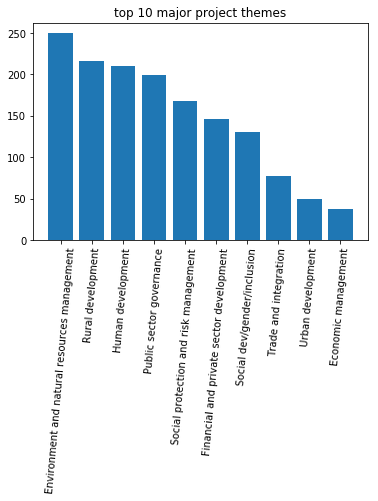

In [73]:
plot_df = plt.bar(pivot1_sort['name'],pivot1_sort['code'])
plt.xticks(rotation=85)
plt.title('top 10 major project themes')